![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## 1. Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## 2. Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## 3. Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics 

%matplotlib inline

In [2]:
# Converting some of the csv files into panda dataframes

imdb_title = pd.read_csv('./data/zippedData/imdb.title.basics.csv.gz')
imdb_title_akas = pd.read_csv('./data/zippedData/imdb.title.akas.csv.gz')
imdb_ratings = pd.read_csv('./data/zippedData/imdb.title.ratings.csv.gz')
imdb_names = pd.read_csv('./data/zippedData/imdb.name.basics.csv.gz') 
imdb_principals = pd.read_csv('./data/zippedData/imdb.title.principals.csv.gz') 
imdb_crew = pd.read_csv('./data/zippedData/imdb.title.crew.csv.gz') 
bom_gross = pd.read_csv('./data/zippedData/bom.movie_gross.csv.gz')


### 3.1 Exploring databases using .info()

#### 3.1.1. Database imdb.title.basics
Below, we notice that only the columns runtime_minutes and genres have null values

In [3]:
imdb_title.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### 3.1.2. Database imdb.title.akas
Below, we notice that few columns have null values


In [5]:
imdb_title_akas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


#### 3.1.3. Database imdb.ratings
Below we notice that all columns have values

In [6]:
imdb_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### 3.1.4. Database bom_gross
Unlike imdb datasets, this one gives us information about domestic and foreign gross. All columns except title have null values

In [7]:
bom_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### 3.2 Exploring databases using .head() and .value_counts()

#### 3.2.1. Database imdb.title.basics

In [8]:
imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
imdb_title['tconst'].value_counts()

tt2111360    1
tt8907932    1
tt3660846    1
tt5594548    1
tt2424906    1
            ..
tt2730134    1
tt2251399    1
tt2458106    1
tt5574092    1
tt2323619    1
Name: tconst, Length: 146144, dtype: int64

**Observation:** each tconst have a unique value. IMDB website defines tconst as "alphanumer unique identifier of the title". As such, we will use tconst to merge title_basics and ratings

In [9]:
imdb_title['primary_title'].value_counts()


Home                  24
The Return            20
Broken                20
Alone                 16
Homecoming            16
                      ..
Sardaar Ji             1
Chhakka Panja          1
Time Does Not Pass     1
3 Blind Saints         1
Rotgut                 1
Name: primary_title, Length: 136071, dtype: int64

**Observation:** IMDB website defines Primary title as follows: the more popular title / the title used by the filmmakers on promotional materials at the point of release

In [10]:
imdb_title['original_title'].value_counts()


Broken                  19
Home                    18
The Return              17
Homecoming              13
Alone                   13
                        ..
A tu lado                1
Dark Figure of Crime     1
Shame on You             1
Yu Qian Shi Wei          1
Exhibition Day           1
Name: original_title, Length: 137773, dtype: int64

In [11]:
imdb_title['start_year'].value_counts()


2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

**Note:** How is it possible that the start year are beyon actual year? eg 2115

In [12]:
imdb_title['runtime_minutes'].value_counts()


90.0     7131
80.0     3526
85.0     2915
100.0    2662
95.0     2549
         ... 
382.0       1
724.0       1
808.0       1
287.0       1
540.0       1
Name: runtime_minutes, Length: 367, dtype: int64

In [13]:
imdb_title['genres'].value_counts()


Documentary                     32185
Drama                           21486
Comedy                           9177
Horror                           4372
Comedy,Drama                     3519
                                ...  
Biography,History,News              1
Animation,Music,Romance             1
Crime,Family,Fantasy                1
Documentary,Music,Reality-TV        1
Action,Horror,Music                 1
Name: genres, Length: 1085, dtype: int64

#### 3.2.1. Database imdb.ratings

In [14]:
imdb_ratings.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
imdb_ratings['tconst'].value_counts()

tt7200076    1
tt6962436    1
tt4126312    1
tt7853260    1
tt8541440    1
            ..
tt2147193    1
tt4027794    1
tt5033000    1
tt1654741    1
tt2774262    1
Name: tconst, Length: 73856, dtype: int64

In [16]:
imdb_ratings['averagerating'].value_counts()

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

In [19]:
imdb_ratings['numvotes'].value_counts()

6        2875
5        2699
7        2476
8        2167
9        1929
         ... 
18286       1
16289       1
1958        1
4007        1
4098        1
Name: numvotes, Length: 7349, dtype: int64

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [20]:
# Here you run your code to clean the data

**Comments:** I decide not to delete or create any column or raw at the moment. I want to keep all the information availalbe at the moment and clean it down the track, once the strategy is more defined. 

In [21]:
# Merge imdb_title and imdb_ratins on tconst, which is an alphanumer unique identifier of the movie title.
#I merge using left join because imdb_title has more raws than ratings, and I want to maintain all the information at the moment.

imdb_title_rating  = pd.merge(imdb_title, 
                              imdb_ratings, 
                              on=['tconst'], 
                              how='left') 


In [22]:
#I confirm that the merging has been sucesfful

imdb_title_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [23]:
imdb_title_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


### Defininig  strategy #1: what are the top 25 IMDB movies between 2015 - 2019 and what are the similarities between these movies?

In [25]:
#DATA CLEANING: To achieve our Strategy 1, we need to know the average rating of each movie, so we can select 
#the top 25 for furhter studies. Herein, we delete all the columns that have no averagerating:

imdb_title_rating.dropna(subset = ['averagerating'], inplace=True)

In [26]:
#We start exploring the movies with the highest average rating by sorting by "average rating" and applying .tail().

imdb_title_rating.sort_values('averagerating').tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
117359,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
71954,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
1857,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0
4016,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5.0
93040,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5.0


From the above table, we notince that those movies with a high averareating value have very low number of votes. In the IMDB website, they mentioned that minimum votes required to be listed in the Top Rated 250 list is currently 25,000 (More info in this link: https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#). 
We will follow the same strategy and delete all the movies with less than 25,000 votes.

In [27]:
#we want to delete the columns with less than 25000 votes
imdb_title_rating.drop(imdb_title_rating[imdb_title_rating['numvotes'] < 25000].index, inplace=True)





In [28]:
imdb_title_rating.sort_values('averagerating').tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
107713,tt6316138,Ayla: The Daughter of War,Ayla: The Daughter of War,2017,125.0,"Drama,History,War",8.7,26743.0
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135.0
43533,tt2592910,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",9.2,41560.0
99483,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",9.3,100568.0


We will focus our studies in recent movies -> movies with less than 5 years. This data include movies from up to 2019, and as such, we will narrow our 5 years range between 2015 - 2019 (both inclusive)

In [29]:
#we create a list with the 25 movies between 2015 - 2019 that have the highest average rating

imdb_top25 = imdb_title_rating[imdb_title_rating['start_year'] >= 2015].sort_values('averagerating').tail(25)

In [30]:
imdb_top25

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
70269,tt4016934,The Handmaiden,Ah-ga-ssi,2016,145.0,"Drama,Romance,Thriller",8.1,79272.0
76697,tt4387040,Airlift,Airlift,2016,130.0,"Drama,History",8.1,48323.0
29109,tt2119532,Hacksaw Ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",8.1,366904.0
21849,tt1895587,Spotlight,Spotlight,2015,129.0,"Crime,Drama",8.1,365110.0
56763,tt3315342,Logan,Logan,2017,137.0,"Action,Drama,Sci-Fi",8.1,560270.0
7213,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi",8.1,780910.0
127087,tt7775622,Free Solo,Free Solo,2018,100.0,"Documentary,Sport",8.2,32250.0
85228,tt4934950,Talvar,Talvar,2015,132.0,"Crime,Drama,Mystery",8.2,25443.0
53866,tt3170832,Room,Room,2015,118.0,"Drama,Thriller",8.2,316791.0
86657,tt5027774,"Three Billboards Outside Ebbing, Missouri","Three Billboards Outside Ebbing, Missouri",2017,115.0,"Crime,Drama",8.2,344047.0


Which insights can we get from this lis? For example, what are the most common genres? What is the average duration of the top 25 movies? 

Let's start with the **average duration of the top 25 IMDB movies**


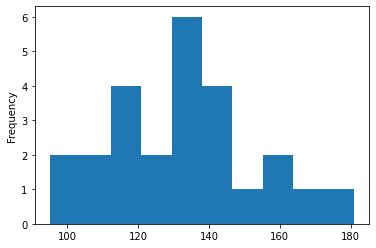

In [32]:
#we create a histogram of the duration, and observe that it doesn't follow a pure normal distribution, 
#so we will work with the median.

imdb_top25['runtime_minutes'].plot.hist();

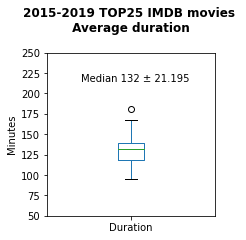

In [108]:
#We create a box plot with the duration ofthe movie
imdb_top25 = imdb_top25.rename(columns={'runtime_minutes': 'Duration'})


fig, ax = plt.subplots(figsize=(3, 3))
imdb_top25['Duration'].plot.box()
ax.set_title('2015-2019 TOP25 IMDB movies \n Average duration \n', fontweight="bold")
ax.set_ylabel('Minutes')
plt.text(0.7, 215, 'Median 132 ± 21.195', fontsize = 10)  #this values come from the following action
ax.set_ylim([50, 250]);

In [91]:
imdb_top25_duration_median = imdb_top25['Duration'].median()
imdb_top25_duration_stdev = statistics.stdev(imdb_top25['Duration'])

print(imdb_top25_duration_mean)
print(imdb_top25_duration_stdev)

132.0
21.195754291838732


Now we move on to understant what are the **most common genres of the top 25 IMDB movies**


In [97]:
#first we extract all the genres into a pandas Series

genres = imdb_top25['genres'].map(lambda x: x.split(','))
type(genres)


pandas.core.series.Series

In [98]:
genres

70269         [Drama, Romance, Thriller]
76697                   [Drama, History]
29109        [Biography, Drama, History]
21849                     [Crime, Drama]
56763            [Action, Drama, Sci-Fi]
7213         [Action, Adventure, Sci-Fi]
127087              [Documentary, Sport]
85228            [Crime, Drama, Mystery]
53866                  [Drama, Thriller]
86657                     [Crime, Drama]
95481                  [Drama, Thriller]
28269     [Adventure, Animation, Comedy]
117014        [Biography, Comedy, Drama]
77309            [Crime, Drama, Mystery]
83932                    [Action, Drama]
38424     [Adventure, Animation, Comedy]
91844        [Animation, Drama, Fantasy]
87402         [Action, Biography, Drama]
80655     [Action, Adventure, Animation]
72820        [Action, Adventure, Sci-Fi]
130754                 [Crime, Thriller]
132555              [Action, Drama, War]
107713             [Drama, History, War]
72821        [Action, Adventure, Sci-Fi]
99483           

In [99]:
#now we want to create a unique list with all the genres listed, and remove the "," so we have only a list of words
col_one_list = imdb_top25['genres'].tolist()

sent_str = ""
for x in col_one_list:
    sent_str += str(x) + ","

sent_str = sent_str.split(',')
sent_str

['Drama',
 'Romance',
 'Thriller',
 'Drama',
 'History',
 'Biography',
 'Drama',
 'History',
 'Crime',
 'Drama',
 'Action',
 'Drama',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Documentary',
 'Sport',
 'Crime',
 'Drama',
 'Mystery',
 'Drama',
 'Thriller',
 'Crime',
 'Drama',
 'Drama',
 'Thriller',
 'Adventure',
 'Animation',
 'Comedy',
 'Biography',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Drama',
 'Adventure',
 'Animation',
 'Comedy',
 'Animation',
 'Drama',
 'Fantasy',
 'Action',
 'Biography',
 'Drama',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Crime',
 'Thriller',
 'Action',
 'Drama',
 'War',
 'Drama',
 'History',
 'War',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Drama',
 'War',
 '']

In [115]:
#now we want to count how many times each genre appears

from collections import Counter

counts_average = Counter(sent_str).most_common()
print(counts_average)
type(counts_average)

[('Drama', 17), ('Action', 9), ('Adventure', 6), ('Crime', 5), ('Thriller', 4), ('Sci-Fi', 4), ('Animation', 4), ('History', 3), ('Biography', 3), ('Comedy', 3), ('War', 3), ('Mystery', 2), ('Romance', 1), ('Documentary', 1), ('Sport', 1), ('Fantasy', 1), ('', 1)]


list

In [116]:
#As we want to ilustrate this data, we will create one list for the names of the genres, and one list with the values

names = []
for x in counts_average:
    names.append(x[0])


values = []
for x in counts_average:
    values.append(x[1])

print(names)
print(values)

['Drama', 'Action', 'Adventure', 'Crime', 'Thriller', 'Sci-Fi', 'Animation', 'History', 'Biography', 'Comedy', 'War', 'Mystery', 'Romance', 'Documentary', 'Sport', 'Fantasy', '']
[17, 9, 6, 5, 4, 4, 4, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1]


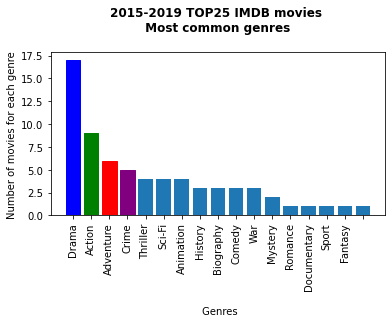

In [204]:
#now we can plot both lists, names and values

fig, ax = plt.subplots(figsize=(6, 3))
barlist=plt.bar(range(len(counts)), values, tick_label=names)
plt.xticks(rotation=90)
ax.set_ylabel('Number of movies for each genre')
ax.set_xlabel('\n Genres')
ax.set_title('2015-2019 TOP25 IMDB movies \n Most common genres \n', fontweight="bold")
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[3].set_color('purple')
plt.show()



The graph above provides "static" information, it shows only the average of genre preferences during 2015-2019. But how did the preference for this genres changed across the past 5 years? Let's investigate it! 

In [152]:
# Before I had a list of list, with each item indicating the genre and the corresponding frequency (list named counts).
# Now I want to create a dictionary from this list, so I use this function

def Convert(lst):
    res_dct = {lst[i][0]: lst[i][1] for i in range(0, len(lst), 2)}
    return res_dct
         

In [153]:
#I test the function with the list of the top25 
counts_dict=(Convert(counts_average))
counts_dict

{'Drama': 17,
 'Adventure': 6,
 'Thriller': 4,
 'Animation': 4,
 'Biography': 3,
 'War': 3,
 'Romance': 1,
 'Sport': 1,
 '': 1}

In [154]:
type(counts_dict)

dict

In [155]:
#Now let's check the value of Drama

print(counts_dict.get('Drama'))

17


Now we have undesrtand how to get the value of each genre. Let's repeat these operations for each year, between 2015 and 2019

In [156]:
imdb_top25_2017 = imdb_title_rating[imdb_title_rating['start_year'] == 2017].sort_values('averagerating').tail(25)
imdb_top25_2018 = imdb_title_rating[imdb_title_rating['start_year'] == 2018].sort_values('averagerating').tail(25)
imdb_top25_2019 = imdb_title_rating[imdb_title_rating['start_year'] == 2019].sort_values('averagerating').tail(25)
imdb_top25_2016 = imdb_title_rating[imdb_title_rating['start_year'] == 2016].sort_values('averagerating').tail(25)
imdb_top25_2015 = imdb_title_rating[imdb_title_rating['start_year'] == 2015].sort_values('averagerating').tail(25)

In [157]:
genres_2017 = imdb_top25_2017['genres'].map(lambda x: x.split(','))
genres_2018 = imdb_top25_2018['genres'].map(lambda x: x.split(','))
genres_2019 = imdb_top25_2019['genres'].map(lambda x: x.split(','))
genres_2016 = imdb_top25_2016['genres'].map(lambda x: x.split(','))
genres_2015 = imdb_top25_2015['genres'].map(lambda x: x.split(','))

In [158]:
col_one_list_2017 = imdb_top25_2017['genres'].tolist()
col_one_list_2018 = imdb_top25_2018['genres'].tolist()
col_one_list_2019 = imdb_top25_2019['genres'].tolist()
col_one_list_2016 = imdb_top25_2016['genres'].tolist()
col_one_list_2015 = imdb_top25_2015['genres'].tolist()



In [159]:
sent_str_2015 = ""
for x in col_one_list_2015:
    sent_str_2015 += str(x) + ","

sent_str_2015 = sent_str_2015.split(',')

In [160]:
sent_str_2016 = ""
for x in col_one_list_2016:
    sent_str_2016 += str(x) + ","

sent_str_2016 = sent_str_2016.split(',')

In [161]:
sent_str_2017 = ""
for x in col_one_list_2017:
    sent_str_2017 += str(x) + ","

sent_str_2017 = sent_str_2017.split(',')

In [162]:
sent_str_2018 = ""
for x in col_one_list_2018:
    sent_str_2018 += str(x) + ","

sent_str_2018 = sent_str_2018.split(',')

In [163]:
sent_str_2019 = ""
for x in col_one_list_2019:
    sent_str_2019 += str(x) + ","

sent_str_2019 = sent_str_2019.split(',')

In [164]:
#let's check that it has worked for 2015

counts_2015 = Counter(sent_str_2015).most_common()
print(counts_2015)


[('Drama', 18), ('Adventure', 6), ('Action', 6), ('Crime', 5), ('Comedy', 5), ('Biography', 4), ('History', 3), ('Thriller', 3), ('Romance', 3), ('Mystery', 3), ('Animation', 2), ('War', 2), ('Documentary', 2), ('Sci-Fi', 2), ('Music', 1), ('Fantasy', 1), ('', 1)]


In [165]:
#let's check that it has worked for 2016

counts_2016 = Counter(sent_str_2016).most_common()
print(counts_2016)


[('Drama', 19), ('Comedy', 7), ('Action', 6), ('Adventure', 6), ('Biography', 5), ('Thriller', 4), ('Sci-Fi', 3), ('Animation', 3), ('History', 3), ('Mystery', 2), ('Music', 2), ('Sport', 1), ('Romance', 1), ('Crime', 1), ('Fantasy', 1), ('War', 1), ('', 1)]


In [166]:
#let's check that it has worked for 2017


counts_2017 = Counter(sent_str_2017).most_common()
print(counts_2017)


[('Drama', 17), ('Action', 9), ('Crime', 6), ('Adventure', 5), ('Comedy', 5), ('Biography', 4), ('Thriller', 3), ('Mystery', 3), ('Romance', 2), ('Animation', 2), ('Family', 2), ('History', 2), ('Sci-Fi', 2), ('Musical', 1), ('Horror', 1), ('Documentary', 1), ('Sport', 1), ('War', 1), ('', 1)]


In [167]:
#let's check that it has worked for 2018 

counts_2018 = Counter(sent_str_2018).most_common()
print(counts_2018)


[('Drama', 14), ('Action', 7), ('Adventure', 7), ('Comedy', 6), ('Sci-Fi', 5), ('Biography', 5), ('Thriller', 5), ('Crime', 4), ('Music', 3), ('Animation', 3), ('History', 2), ('Romance', 2), ('Horror', 1), ('Mystery', 1), ('Documentary', 1), ('Sport', 1), ('', 1)]


In [171]:
#let's check that it has worked for 2019

counts_2019 = Counter(sent_str_2019).most_common()
print(counts_2019)


[('Action', 14), ('Adventure', 12), ('Drama', 9), ('Crime', 6), ('Sci-Fi', 5), ('Comedy', 5), ('Biography', 4), ('Thriller', 4), ('Horror', 3), ('Mystery', 2), ('Family', 2), ('Fantasy', 2), ('Animation', 2), ('Documentary', 1), ('Music', 1), ('War', 1), ('', 1)]


In [172]:
counts_dict_2015=dict(counts_2015)
counts_dict_2016=dict(counts_2016)
counts_dict_2017=dict(counts_2017)
counts_dict_2018=dict(counts_2018)
counts_dict_2019=dict(counts_2019)


In [173]:
#Let's check the values of drama for each year

print(counts_dict_2015.get('Drama'))
print(counts_dict_2016.get('Drama'))
print(counts_dict_2017.get('Drama'))
print(counts_dict_2018.get('Drama'))
print(counts_dict_2019.get('Drama'))

18
19
17
14
9


In [174]:
#We create a list with the drama values for each year:

drama_list = [counts_dict_2015.get('Drama'), counts_dict_2016.get('Drama'), counts_dict_2017.get('Drama'), counts_dict_2018.get('Drama'), counts_dict_2019.get('Drama')]

In [176]:
#we check that the drama_list contains the correct information

drama_list

[18, 19, 17, 14, 9]

In [177]:
##Let's repeat for Action

action_list = [counts_dict_2015.get('Action'), counts_dict_2016.get('Action'), counts_dict_2017.get('Action'), counts_dict_2018.get('Action'), counts_dict_2019.get('Action')]


In [178]:
##Let's repeat for Adventure

adventure_list = [counts_dict_2015.get('Adventure'), counts_dict_2016.get('Adventure'), counts_dict_2017.get('Adventure'), counts_dict_2018.get('Adventure'), counts_dict_2019.get('Adventure')]


In [181]:
##Let's repeat for Crime

crime_list = [counts_dict_2015.get('Crime'), counts_dict_2016.get('Crime'), counts_dict_2017.get('Crime'), counts_dict_2018.get('Crime'), counts_dict_2019.get('Crime')]


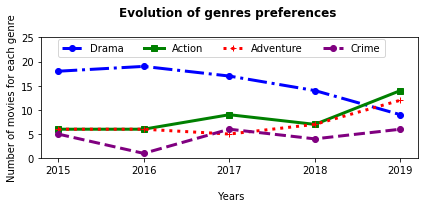

In [205]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(('2015','2016','2017','2018','2019'), drama_list , color="blue", lw=3, ls='-.', marker='o')
ax.plot(('2015','2016','2017','2018','2019'), action_list , color="green", lw=3, ls='-', marker='s')
ax.plot(('2015','2016','2017','2018','2019'), adventure_list , color="red", lw=3, ls=':', marker='+')
ax.plot(('2015','2016','2017','2018','2019'), crime_list , color="purple", lw=3, ls='--', marker='o')
ax.set_title('Evolution of genres preferences \n', fontweight="bold")
ax.set_ylabel('Number of movies for each genre')
ax.set_xlabel('\n Years')
ax.set_ylim([0, 25]);
fig.legend(ncol = 4, labels=["Drama", "Action", "Adventure", "Crime"], bbox_to_anchor=(0.91,0.82))
fig.tight_layout();

# Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

**NOW I WANT TO START PLAYING WITH THE MOB DATABASE**

In [68]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [69]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


from here we can see that foreign_gross is an obj, not an int. To change the type to int, first we have to delete the NaN values from that columns.

In [70]:
bom_gross.dropna(subset = ['foreign_gross'], inplace=True)

In [71]:

# I am doing this step because i was having errors of not being able to convert into float 
bom_gross["foreign_gross"] = [float(str(i).replace(",", "")) for i in bom_gross["foreign_gross"]]


In [72]:
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].astype(float)

In [73]:
#so far I don't want to delete columns, because maybe they have domestic gross but not foreign. So better to remove the column that total is n/v

In [74]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            2037 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.5+ KB


In [75]:
bom_gross['total_gross'] = bom_gross['foreign_gross'] + bom_gross['domestic_gross']

In [76]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


nicer to read

In [77]:
bom_gross['nicer_gross'] = f"{bom_gross['foreign_gross']}"


In [78]:
bom_gross.drop(['nicer_gross'], axis = 1, inplace=True)


In [79]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [80]:
gross_top10 = bom_gross[bom_gross['year'] > 2015].sort_values('total_gross').tail(10)
gross_top10

,title,studio,domestic_gross,foreign_gross,year,total_gross
2322,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
2392,Finding Mr. Right 2,CL,NaN,114700000.0,2016,NaN
2468,Solace,LGP,NaN,22400000.0,2016,NaN
2595,Viral,W/Dim.,NaN,552000.0,2016,NaN
2825,Secret Superstar,NaN,NaN,122000000.0,2017,NaN


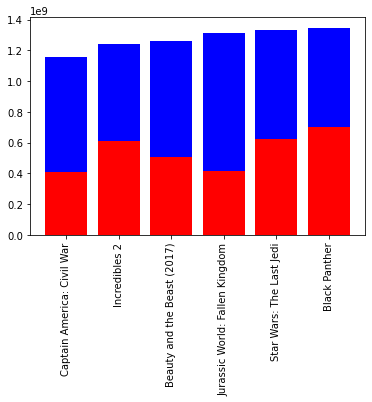

In [81]:

x = gross_top10['title']
y1 = gross_top10['domestic_gross']
y2 = gross_top10['foreign_gross']
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.xticks(rotation=90)
plt.show()

In [82]:
gross_top25 = bom_gross[bom_gross['year'] >= 2015].sort_values('total_gross').tail(25)
gross_top25.dropna(subset = ['total_gross'], inplace=True)
gross_top25


,title,studio,domestic_gross,foreign_gross,year,total_gross
2327,The Secret Life of Pets,Uni.,368400000.0,507100000.0,2016,8.755000e+08
2763,Spider-Man: Homecoming,Sony,334200000.0,546000000.0,2017,8.802000e+08
1877,Spectre,Sony,200100000.0,680600000.0,2015,8.807000e+08
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
2762,Jumanji: Welcome to the Jungle,Sony,404500000.0,557600000.0,2017,9.621000e+08
2326,The Jungle Book (2016),BV,364000000.0,602500000.0,2016,9.665000e+08
2325,Zootopia,BV,341300000.0,682500000.0,2016,1.023800e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09
2761,Despicable Me 3,Uni.,264600000.0,770200000.0,2017,1.034800e+09


In [83]:
studios = dict(gross_top25['studio'].value_counts())
studios

{'BV': 11, 'Uni.': 4, 'Sony': 3, 'Fox': 1, 'WB': 1}

In [84]:
studios_values = studios.values()

In [85]:
studios_keys = studios.keys()

In [86]:
studios

{'BV': 11, 'Uni.': 4, 'Sony': 3, 'Fox': 1, 'WB': 1}

In [87]:
gross_top25['total_gross'].mean() / 1000000

1095.49505658

In [88]:

gross_top25_SEM = statistics.stdev(gross_top25['total_gross'])
gross_top25_mean = statistics.mean(gross_top25['total_gross'])


In [89]:
gross_top25_SEM_M=gross_top25_SEM/1000000
gross_top25_SEM_M

173.75255092657858

In [90]:
gross_top25_mean_M=gross_top25_mean/1000000
gross_top25_mean_M

1095.49505658

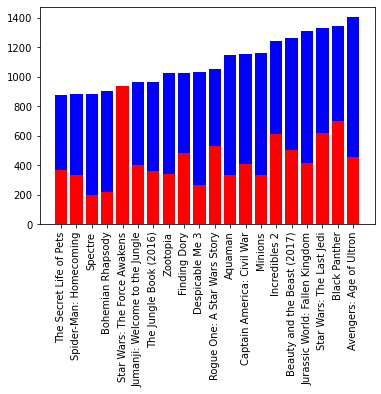

In [91]:

x = gross_top25['title']
y1 = gross_top25['domestic_gross']/1000000
y2 = gross_top25['foreign_gross']/1000000
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.xticks(rotation=90)
plt.show()

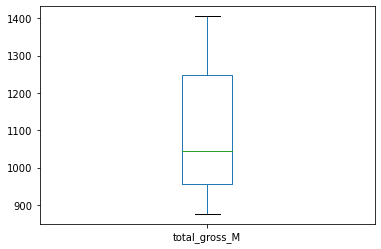

In [92]:
gross_top25['total_gross_M']=gross_top25['total_gross'] / 1000000
gross_top25['total_gross_M'].plot.box();

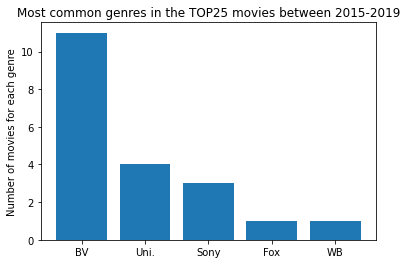

In [93]:
fig, ax = plt.subplots()
plt.bar(studios_keys, studios_values,)
ax.set_ylabel('Number of movies for each genre')
ax.set_title('Most common genres in the TOP25 movies between 2015-2019')
plt.show()

that's a bit of a weird value....

**EXPLORING OTHER DATABASES**

In [94]:
rt_reviews = pd.read_csv('./data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding="latin-1")
rt_movies = pd.read_csv('./data/zippedData/rt.movie_info.tsv.gz', sep='\t', encoding="latin-1")


In [95]:
rt_movies = pd.read_csv('./data/zippedData/rt.csv')



I was having problems reading this file, I tried latin-1, UT8-8, unviersal... phyton engine.... erros false and i READ SOMEONE THAt said open the file and save it as csv WITH utf-8

In [96]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [97]:
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [98]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [99]:
rt_reviews.head(15)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [100]:
tmdb = pd.read_csv('./data/zippedData/tmdb.movies.csv.gz')


In [101]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [102]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [103]:
tn_movie = pd.read_csv('./data/zippedData/tn.movie_budgets.csv.gz')


In [104]:
tn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [105]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [106]:
tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross'].str.replace('$', '')


In [107]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","1,316,721,747"


In [108]:
tn_1 = tn_movie.iloc[1]
tn_1

id                                                               2
release_date                                          May 20, 2011
movie                  Pirates of the Caribbean: On Stranger Tides
production_budget                                     $410,600,000
domestic_gross                                        $241,063,875
worldwide_gross                                     $1,045,663,875
worldwide_gross_new                                  1,045,663,875
Name: 1, dtype: object

In [109]:
tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross'].str.replace(',', '')


In [110]:
tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross_new'].str.replace('$', '')


In [111]:
tn_1 = tn_movie.iloc[1]
tn_1

id                                                               2
release_date                                          May 20, 2011
movie                  Pirates of the Caribbean: On Stranger Tides
production_budget                                     $410,600,000
domestic_gross                                        $241,063,875
worldwide_gross                                     $1,045,663,875
worldwide_gross_new                                     1045663875
Name: 1, dtype: object

In [112]:
tn_1.loc['worldwide_gross_new'][:-3]

'1045663'

In [113]:
tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross_new'].astype(float)

In [114]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1.316722e+09


In [115]:
tn_movie['production_budget_new'] = tn_movie['production_budget'].str.replace('$', '')


In [116]:
tn_movie['production_budget_new'] = tn_movie['production_budget_new'].str.replace(',', '')


In [117]:
tn_movie['production_budget_new'] = tn_movie['production_budget_new'].astype(float)

In [118]:
tn_movie['release_date'][-4:]

5778     Apr 2, 1999
5779    Jul 13, 2005
5780    Sep 29, 2015
5781     Aug 5, 2005
Name: release_date, dtype: object

In [119]:
tn_movie['release_date']=pd.to_datetime(tn_movie['release_date'])

In [120]:
tn_top25 = tn_movie[tn_movie['release_date'].dt.year == 2015]


In [121]:
tn_top25

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1.403014e+09,330600000.0
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2.053311e+09,306000000.0
9,10,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",8.796209e+08,300000000.0
33,34,2015-06-12,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",1.648855e+09,215000000.0
66,67,2015-04-03,Furious 7,"$190,000,000","$353,007,020","$1,518,722,794",1.518723e+09,190000000.0
...,...,...,...,...,...,...,...,...
5750,51,2015-04-21,Ten,"$25,000",$0,$0,0.000000e+00,25000.0
5751,52,2015-12-01,Dutch Kills,"$25,000",$0,$0,0.000000e+00,25000.0
5756,57,2015-04-21,The Front Man,"$20,000",$0,$0,0.000000e+00,20000.0
5771,72,2015-05-19,Family Motocross,"$10,000",$0,$0,0.000000e+00,10000.0


In [122]:
tn_movie_top25 = tn_movie[tn_movie['release_date'].dt.year >= 2015].sort_values('worldwide_gross_new').tail(25)


In [123]:
tn_movie_top25

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
9,10,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",8.796209e+08,300000000.0
98,99,2017-07-07,Spider-Man: Homecoming,"$175,000,000","$334,201,140","$880,166,350",8.801664e+08,175000000.0
625,26,2016-07-08,The Secret Life of Pets,"$75,000,000","$368,384,330","$886,750,534",8.867505e+08,75000000.0
983,84,2018-11-02,Bohemian Rhapsody,"$55,000,000","$216,303,339","$894,985,342",8.949853e+08,55000000.0
96,97,2016-04-15,The Jungle Book,"$175,000,000","$364,001,123","$962,854,547",9.628545e+08,175000000.0
437,38,2017-12-20,Jumanji: Welcome to the Jungle,"$90,000,000","$404,508,916","$964,496,193",9.644962e+08,90000000.0
156,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09,150000000.0
45,46,2016-06-17,Finding Dory,"$200,000,000","$486,295,561","$1,021,215,193",1.021215e+09,200000000.0
629,30,2017-06-30,Despicable Me 3,"$75,000,000","$264,624,300","$1,034,727,750",1.034728e+09,75000000.0
44,45,2016-12-16,Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856",1.049103e+09,200000000.0


In [135]:
tn_movie_top25_nice = tn_movie_top25[['release_date', 'movie']]

In [136]:

tn_movie_top25_nice

,release_date,movie
9,2015-11-06,Spectre
98,2017-07-07,Spider-Man: Homecoming
625,2016-07-08,The Secret Life of Pets
983,2018-11-02,Bohemian Rhapsody
96,2016-04-15,The Jungle Book
437,2017-12-20,Jumanji: Welcome to the Jungle
156,2016-03-04,Zootopia
45,2016-06-17,Finding Dory
629,2017-06-30,Despicable Me 3
44,2016-12-16,Rogue One: A Star Wars Story


In [134]:
tn_movie_top25_nice

,release_date,movie
9,1970-01-01 00:00:00.000002015,Spectre
98,1970-01-01 00:00:00.000002017,Spider-Man: Homecoming
625,1970-01-01 00:00:00.000002016,The Secret Life of Pets
983,1970-01-01 00:00:00.000002018,Bohemian Rhapsody
96,1970-01-01 00:00:00.000002016,The Jungle Book
437,1970-01-01 00:00:00.000002017,Jumanji: Welcome to the Jungle
156,1970-01-01 00:00:00.000002016,Zootopia
45,1970-01-01 00:00:00.000002016,Finding Dory
629,1970-01-01 00:00:00.000002017,Despicable Me 3
44,1970-01-01 00:00:00.000002016,Rogue One: A Star Wars Story


KeyError: ('release_date', 'movie')

In [ ]:
tn_movie_top25_nice_2 = tn_movie_top25.drop(['release_date'], axis=1)

In [ ]:
tn_movie_top25_nice_2

In [ ]:
tn_movie_top25['production_budget_new'].mean() / 1000000

In [ ]:
tn_movie_top25['worldwide_gross_new'].mean() / 1000000

In [ ]:
fig, ax = plt.subplots()

# Graph X vs. Y as a scatter plot
ax.scatter(tn_movie_top25['production_budget_new'], tn_movie_top25['worldwide_gross_new'], s=60, alpha=0.7, edgecolors="k")



m, b = np.polyfit(tn_movie_top25['production_budget_new'], tn_movie_top25['worldwide_gross_new'], 1)


plt.plot(tn_movie_top25['production_budget_new'], m*tn_movie_top25['production_budget_new'] + b,  color="black", lw=0.5)



In [ ]:
stats.pearsonr(tn_movie_top25['production_budget_new'], tn_movie_top25['worldwide_gross_new'])

#Pearson’s r (0,4063—same as we got in Excel, R, etc.)
#A p-value. This is the probability that the true value of r is zero (no correlation).



In [ ]:
imdb_names.head()

In [ ]:
rt_reviews.head(15)

In [ ]:
rt_reviews['rating_new'] = rt_reviews['rating']

In [ ]:
rt_reviews.dropna(subset = ['rating_new'], inplace=True)

In [ ]:
rt_reviews.head()

In [ ]:
a = rt_reviews[rt_reviews['rating_new'].astype(str).str.isdigit()]





In [ ]:
rt_movies.head()

In [ ]:
imdb_principals.head()

In [ ]:
tn_movie_top25.head(2)

In [ ]:
imdb_title_rating.head(2)

In [ ]:
tn_movie_top25 = tn_movie_top25.rename(columns={'movie': 'original_title'})
tn_movie_top25.head(2)

In [ ]:
gross_director_1  = pd.merge(tn_movie_top25, 
                              imdb_title_rating, 
                              on=['original_title'], 
                              how='inner') 

In [ ]:
gross_director_2  = pd.merge(gross_director_1, 
                              imdb_crew, 
                              on=['tconst'], 
                              how='inner') 

In [ ]:
gross_director_3 = gross_director_2.rename(columns={'directors': 'directors'})


In [ ]:
gross_director_3.head(2)

In [ ]:
gross_director_3['directors'].value_counts()


In [ ]:
col_one_directors = gross_director_3['directors'].tolist()

sent_str = ""
for x in col_one_directors:
    sent_str += str(x) + ","

directors_str = sent_str.split(',')
directors_str

In [ ]:
directors = Counter(directors_str).most_common()
print(directors)
type(directors)

In [ ]:
directors[0][0]

In [ ]:
imdb_names.head()

In [ ]:
const_directors = []
for x in directors:
    const_directors.append(x[0])


repetitions_directors = []
for x in directors:
    repetitions_directors.append(x[1])


In [ ]:
d = {'directors':const_directors,'repetition':repetitions_directors}
df_directors = pd.DataFrame(d)

df_directors = df_directors.rename(columns={'directors': 'nconst'})
df_directors

In [ ]:
gross_director_4  = pd.merge(df_directors, 
                              imdb_names, 
                              on=['nconst'], 
                              how='inner') 

In [ ]:
gross_director_5 = gross_director_4.drop(['nconst','birth_year', 'death_year','primary_profession', 'known_for_titles'], axis = 1)
gross_director_5.head(2)

In [ ]:
gross_director_5 = gross_director_5.rename(columns={'primary_name': 'Director', 'repetition' : 'number of Top 25 movies'})
gross_director_5

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***